<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

path = os.getcwd()

print(path)

try:
    os.chdir("/content/drive/My Drive/データ解析のための統計モデリング")
except:
    pass

os.getcwd()

/content


'/content/drive/My Drive/データ解析のための統計モデリング'

In [ ]:
!pip install japanize-matplotlib

In [ ]:
import requests
import zipfile
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('data/data3a.csv')
df.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


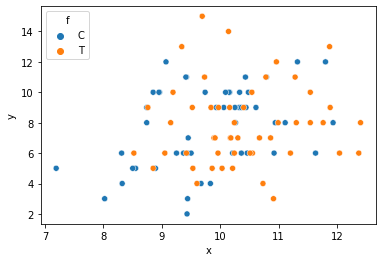

In [ ]:
# 散布図
sns.scatterplot(x='x', y='y', hue='f', data=df)

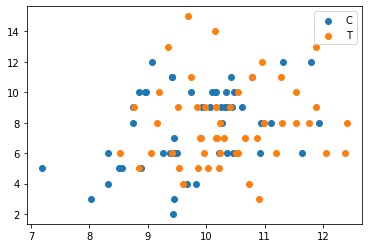

In [ ]:
labels = ['C','T']
for label in labels:
  plt.scatter(df[df['f']==label]['x'],df[df['f']==label]['y'],label=label)
plt.legend(loc='best')

[Text(0, 0, 'C'), Text(0, 0, 'T')]

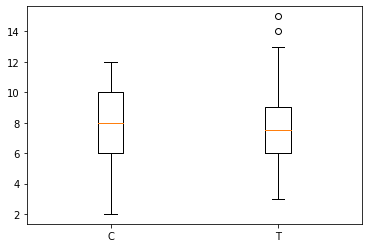

In [ ]:
# 箱ひげ図
fig, ax = plt.subplots()
ax.boxplot([df[df['f']=='C']['y'], df[df['f']=='T']['y']])
ax.set_xticklabels(['C', 'T'])

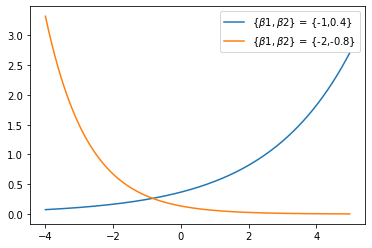

In [ ]:
x = np.arange(-4,5,0.01)
lam1 = lambda x: np.exp(-1+0.4*x)
lam2 = lambda x: np.exp(-2-0.8*x)
plt.plot(x,lam1(x), label=r'{$\beta 1, \beta 2$} = {-1,0.4}')
plt.plot(x,lam2(x), label=r'{$\beta 1, \beta 2$} = {-2,-0.8}')
plt.legend(loc='best')

In [ ]:
import statsmodels.formula.api as smf

results = smf.poisson('y ~ x', data=df).fit()

results.summary()

Optimization terminated successfully.
         Current function value: 2.353863
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Jul 2021   Pseudo R-squ.:                0.009497
Time:                        13:19:41   Log-Likelihood:                -235.39
converged:                       True   LL-Null:                       -237.64
Covariance Type:            nonrobust   LLR p-value:                   0.03362
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

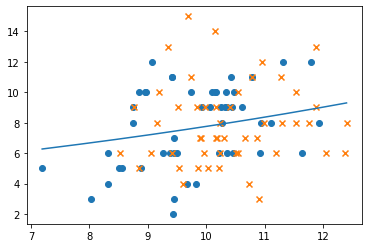

In [ ]:
# 散布図
plt.scatter(df[df['f']=='C']['x'], df[df['f']=='C']['y'], marker='o', label='C')
plt.scatter(df[df['f']=='T']['x'], df[df['f']=='T']['y'], marker='x', label='T')

# λの予測値
x = np.arange(df['x'].min(), df['x'].max() + 0.01, 0.01)
y = lambda x : np.exp(results.params['Intercept'] + results.params['x'] * x)

plt.plot(x,y(x))

In [ ]:
!pip install opencv-python Pillow
!pip install --no-deps japanmap
import japanmap as jp

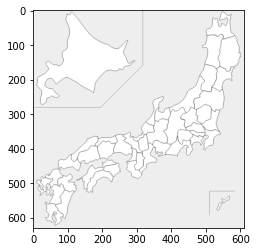

In [ ]:
jp.pref_names
plt.imshow(jp.picture())

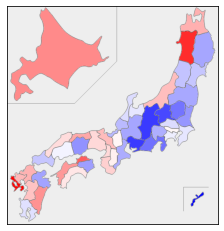

In [ ]:
df = pd.read_csv("https://oku.edu.mie-u.ac.jp/~okumura/stat/data/gansokuhou2016.csv")
x = df['年齢調整罹患率日本総数'][1:48]
x = (x - min(x)) / (max(x) - min(x))
cmap = plt.get_cmap('bwr')  # or 'coolwarm' or 'cividis_r' etc...

# picture() がnumpy.uint8型を受け付けないみたいなのでintに変換
def tint(t):
    return tuple(int(_) for _ in t)

d = {i: tint(cmap(x[i], bytes=True)[:3]) for i in range(1,48)}
plt.imshow(jp.picture(d))

# 不要なティックやラベルを削除する
plt.tick_params(bottom=False, top=False, left=False, right=False,
                labelbottom=False, labeltop=False, labelleft=False, labelright=False)

plt.savefig('190613a.png', bbox_inches="tight")

In [ ]:
while True:  
  x = input()

  try:
    x = float(x)

    if x < 0:
      print("マイナスなのでプラスに変換")
      x = abs(x)

    rnew = x
    while True:
      r1 = rnew
      r2 = x/r1
      diff = abs(r2-r1)
      if diff <= 10E-6*r1:
        print(diff,10E-6*r1)
        break
      else:
        rnew = (r1+r2)/2
    print(rnew, np.sqrt(x))

  except ValueError:
    if x == 'end':
      print(x)
      break
    print(x,"数字を入力してください")
    continue

  


-4
マイナスなのでプラスに変換
1.858445852764845e-07 2.0000000929222948e-05
2.0000000929222947 2.0
q
q 数字を入力してください
-4
マイナスなのでプラスに変換
1.858445852764845e-07 2.0000000929222948e-05
2.0000000929222947 2.0
-100
マイナスなのでプラスに変換
2.7979396577393345e-10 0.00010000000000139898
10.000000000139897 10.0
end
end
